In [1]:

import sys, os

sys.path.append(os.path.abspath(os.path.join('../scripts')))


In [138]:
import importlib
import fetch
importlib.reload(fetch)
from fetch import FetchData

In [3]:
from shapely.geometry import shape, GeometryCollection, Polygon,Point
import geopandas as gpd

In [4]:
import pyproj

In [9]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)


,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


In [10]:

data=FetchData("IA_FullState").fetch_elevation(grid,"EPSG:4326")

In [8]:
data[0].describe()

,elevation
count,189060.000000
mean,316.202441
std,2.537666
min,306.290000
25%,315.080000
50%,317.150000
75%,317.940000
max,319.760000


In [7]:

import matplotlib.pyplot as plt
%matplotlib widget
FetchData("IA_FullState").visualize3D(data[0])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
%matplotlib widget
FetchData("IA_FullState").visualize2D(data[0])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
data[0].head()

,elevation,geometry
0,310.10,POINT (-93.75605 41.91804)
1,310.56,POINT (-93.75566 41.91819)
2,310.40,POINT (-93.75605 41.91864)
3,311.59,POINT (-93.75606 41.91908)
4,312.16,POINT (-93.75586 41.91923)


In [52]:
standardized=FetchData("IA_FullState").standardize(data[0],1)

D:\Users\same\anaconda3\envs\pdalworkshop\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [53]:
standardized

,elevation,geometry
0,309.942788,POINT (-93.75615 41.91802)
1,310.012600,POINT (-93.75615 41.91803)
2,310.047287,POINT (-93.75615 41.91804)
3,310.033208,POINT (-93.75615 41.91804)
4,310.032842,POINT (-93.75615 41.91805)
...,...,...
499250,318.257498,POINT (-93.74734 41.92139)
499251,318.354460,POINT (-93.74734 41.92140)
499252,318.352785,POINT (-93.74734 41.92140)
499253,318.333323,POINT (-93.74734 41.92141)


In [19]:
%matplotlib widget
FetchData("IA_FullState").visualize3D(standardized)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# import geoplot
# import geoplot.crs as gcrs
# geoplot.kdeplot(data[0],shade=True, cmap='Spectral_r',projection=gcrs.WebMercator(), shade_lowest=True)

In [ ]:
# import numpy as np
# x=data[0].geometry.x
# y=data[0].geometry.y
# z = np.array(data[0].elevation)

# z = z.reshape((len(x), len(y)))
# plt.contour(x,y,z, colors='black');

In [137]:
import importlib
import fetch_without_region
importlib.reload(fetch_without_region)

KeyboardInterrupt: 

In [7]:
from fetch_without_region import FetchDataRegionLess

In [7]:
import geopandas as gpd

In [9]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


In [10]:
FetchDataRegionLess().fetch_elevation(grid,4326)

Done with IA_FullState/
Done with NE_Rainwater-2_2009/
Done with SD_James_River_NRCS_J_2010/
Done with SD_McCook_County_2012/
Done with SD_Spink_County_2012/
Done with USGS_LPC_FL_Lower_Choctawhatchee_2017_LAS_2019/


In [140]:
matrix=FetchData("IA_FullState").topographicWetnessIndex(data[0],1)

In [141]:
matrix

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 276.70082626, 301.22032208, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 156.24275326, 316.71418676, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        , 249.45311023, 454.4574084 , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

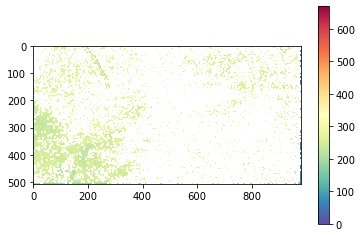

In [143]:
import matplotlib.pyplot as plt
import matplotlib
current_cmap = matplotlib.cm.get_cmap("Spectral_r").copy()
# current_cmap.set_bad(color='white')

plt.imshow(matrix, cmap="Spectral_r")
plt.colorbar()
plt.show()